In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
L = 1.0
nx = 51
dx = L / (nx - 1)
alpha = 1.22e-3

x = np.linspace(0.0, L, num=nx)

T0 = np.zeros(nx)
T0[0] = 100.0

In [3]:
def ftcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
    return T

In [20]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)

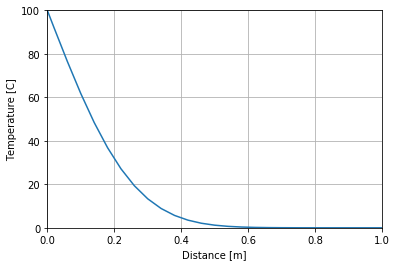

In [21]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [C]')
plt.grid()
plt.plot(x, T)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);

In [8]:
nt = 1000

T = ftcs(T0, nt, dt, dx, alpha)

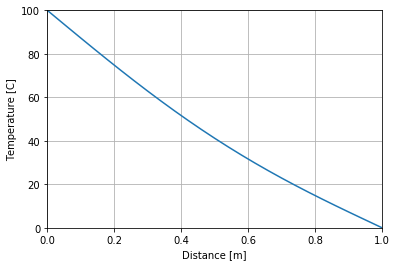

In [9]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [C]')
plt.grid()
plt.plot(x, T)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);

In [13]:
def ftcs_mbc(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
        T[-1] = T[-2]
    return T

In [14]:
nt = 1000

T = ftcs_mbc(T0, nt, dt, dx, alpha)

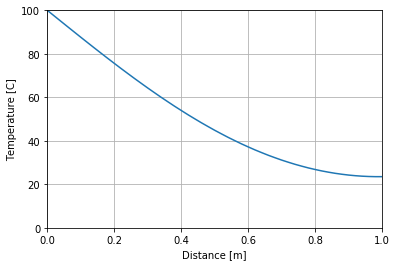

In [15]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [C]')
plt.grid()
plt.plot(x, T)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);

In [27]:
def ftcs2(T0, nt, dt, dx, alpha, q):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = (T[1:-1] + sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
        T[0] = T0[0]
        T[-1] = T[-2] + (q * dx)
    return T

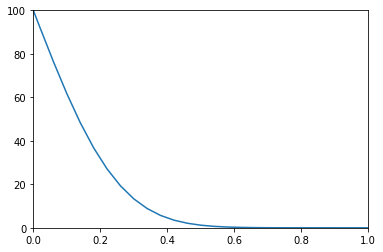

In [28]:
nt = 100
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs2(T0, nt, dt, dx, alpha, q=0.0)
plt.plot(x, T)
plt.xlim(0.0, L)
plt.ylim(0.0, 100);